##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import scipy.sparse as sp
from datetime import datetime
from ydata_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")
# df = pd.read_csv("/content/drive/MyDrive/WB_OLX/real_estate_ads 3.csv")
# df = pd.read_csv("C:\\Users\\marci\\Downloads\\pojebana_csvka_go_craaaaazy\\pojebana_csvka_go_craaaaazy.xls")
# desc = pd.read_csv("C:\\Users\\marci\\Downloads\\desc_topic.csv")
df = pd.read_csv("pojebana_csvka_go_craaaaazy\\pojebana_csvka_go_craaaaazy.xls")
desc = pd.read_csv("desc_topic.csv")

## Basic statistics and analysis

In [3]:
df.head()

,id,market,created_at_first,created_at,district_lon,district_lat,title,description,price,m,...,washing_machine,oven,dishwasher,tv,entryphone,closed_area,monitoring,anti_burglary_door,roller_shutters,alarm
0,49341,2,2018-01-04 13:11:05,2018-01-08 11:27:35,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,289000.0,48.000000,...,0,0,0,0,0,0,0,0,0,0
1,261720,2,2018-01-15 19:12:07,2018-01-25 11:11:31,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,379000.0,61.000000,...,0,0,0,0,0,0,0,0,0,0
2,50441,2,2018-01-04 13:53:29,2018-01-11 05:55:12,16.9408,52.38356,Rataje Nowe Miasto Niski Blok,<p>Weychan Nieruchomości Monika Hałas - Kurcza...,339000.0,63.000000,...,0,0,0,0,1,0,0,0,0,0
3,203518,2,2018-01-12 11:10:57,2018-01-30 14:38:39,16.9408,52.38356,"Mieszkanie 3 pokojowe blisko tramwaju, Poznań os.",<p>Oferuję na sprzedaż jasne i zadbane mieszka...,330000.0,59.200001,...,0,0,0,0,1,0,0,0,0,0
4,5,2,2018-01-02 11:34:51,2018-01-18 14:22:29,16.9408,52.38356,"Inwestycja -rondo Rataje student AWF,POLITECHNIKA",<p><strong>Dwa pokoje na niskim piętrze tuż pr...,259000.0,38.000000,...,1,0,0,0,1,0,0,0,0,0


In [4]:
desc.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
0,1.000000,1.357593e-306,2.893234e-307,4.311147e-307,2.347264e-306,7.324353e-308,2.073269e-306,6.051483e-307,9.445099e-307,3.454999e-307,...,3.254238e-307,1.931281e-307,8.066192e-308,2.241937e-307,2.488141e-307,3.560156e-307,1.089161e-307,1.527364e-307,1.052543e-307,1.885789e-307
1,0.108704,1.382680e-03,2.629494e-04,6.212237e-04,2.236928e-03,8.644329e-05,1.781232e-03,6.083395e-04,1.047101e-03,4.497784e-04,...,4.247414e-04,2.019856e-04,1.065165e-04,5.931803e-04,2.814421e-04,5.154491e-04,1.089486e-04,3.779765e-04,1.148382e-04,2.413455e-04
2,0.467394,3.528248e-01,4.086122e-03,8.369941e-03,3.396650e-02,1.616024e-03,1.937996e-02,9.346549e-03,1.439304e-02,4.751795e-03,...,5.429577e-03,3.800732e-03,2.209178e-03,2.069247e-03,4.369802e-03,4.764892e-03,1.937723e-03,2.134303e-03,1.535459e-03,2.438574e-03
3,0.806704,2.428691e-04,6.557309e-05,1.126734e-04,5.724455e-04,1.902063e-05,4.049451e-04,1.564008e-04,2.113508e-04,6.624567e-05,...,6.391068e-05,4.325130e-05,1.976439e-05,2.912086e-05,5.924220e-05,6.405117e-05,2.883527e-05,2.801014e-05,1.926692e-05,3.855275e-05
4,0.778794,6.215587e-03,1.200272e-03,2.605720e-03,9.989018e-03,3.805317e-04,7.801367e-03,2.814710e-03,4.824709e-03,2.347292e-03,...,1.844131e-03,8.863763e-04,4.121158e-04,4.647455e-03,1.070394e-03,1.756168e-03,4.691628e-04,2.187919e-03,4.904569e-04,1.040398e-03


In [5]:
df = pd.concat([df,desc], axis=1)

Potential columns to delete: `title`
Columns to separate: `price`, `price_per_m`

Convert `district_lon` and `district_lat` to a categrorical (one-hot encoded?) variable `district`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13745 entries, 0 to 13744
Data columns (total 82 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13745 non-null  int64  
 1   market               13745 non-null  int64  
 2   created_at_first     13745 non-null  object 
 3   created_at           13745 non-null  object 
 4   district_lon         13558 non-null  float64
 5   district_lat         13558 non-null  float64
 6   title                12818 non-null  object 
 7   description          13745 non-null  object 
 8   price                13745 non-null  float64
 9   m                    13745 non-null  float64
 10  price_per_m          13745 non-null  float64
 11  map_lon              13745 non-null  float64
 12  map_lat              13745 non-null  float64
 13  price[currency]      13745 non-null  object 
 14  rooms_num            13745 non-null  int64  
 15  building_type        11011 non-null 

In [7]:
df = df.drop(columns=['title'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13745 entries, 0 to 13744
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13745 non-null  int64  
 1   market               13745 non-null  int64  
 2   created_at_first     13745 non-null  object 
 3   created_at           13745 non-null  object 
 4   district_lon         13558 non-null  float64
 5   district_lat         13558 non-null  float64
 6   description          13745 non-null  object 
 7   price                13745 non-null  float64
 8   m                    13745 non-null  float64
 9   price_per_m          13745 non-null  float64
 10  map_lon              13745 non-null  float64
 11  map_lat              13745 non-null  float64
 12  price[currency]      13745 non-null  object 
 13  rooms_num            13745 non-null  int64  
 14  building_type        11011 non-null  float64
 15  floor_no             12777 non-null 

In [8]:
df.describe()

,id,market,district_lon,district_lat,price,m,price_per_m,map_lon,map_lat,rooms_num,...,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
count,1.374500e+04,13745.000000,13558.000000,13558.000000,1.374500e+04,13745.000000,13745.000000,13745.000000,13745.000000,13745.000000,...,1.374500e+04,1.374500e+04,1.374500e+04,1.374500e+04,1.374500e+04,1.374500e+04,1.374500e+04,1.374500e+04,1.374500e+04,1.374500e+04
mean,7.167671e+06,1.433176,16.951352,52.384295,3.673920e+05,69.337546,7465.285211,16.958631,52.386663,2.491742,...,3.952967e-03,3.291828e-03,1.987658e-03,2.174955e-03,2.717310e-03,2.784297e-03,1.210866e-03,1.564558e-03,1.168946e-03,1.310531e-03
std,2.433166e+06,0.495532,0.017883,0.006059,3.557315e+05,2277.035937,7047.365571,0.015636,0.007368,0.859757,...,5.168867e-02,4.996341e-02,3.657093e-02,2.897163e-02,4.363164e-02,4.140916e-02,2.923420e-02,2.821970e-02,2.925193e-02,2.827074e-02
min,5.000000e+00,1.000000,16.844790,52.345360,1.990600e+04,15.200000,1.000000,16.937952,52.372203,1.000000,...,1.627517e-307,9.590838e-308,4.137250e-308,7.274601e-308,1.094157e-307,1.193638e-307,4.424652e-308,6.790200e-308,4.559358e-308,5.941472e-308
25%,6.266453e+06,1.000000,16.940800,52.383560,2.855750e+05,38.000000,6650.000000,16.947195,52.379158,2.000000,...,4.341240e-307,1.890387e-307,8.974570e-308,7.004418e-307,2.481282e-307,4.197942e-307,1.034550e-307,4.380987e-307,1.102402e-307,2.246464e-307
50%,8.160276e+06,1.000000,16.940800,52.383560,3.350000e+05,48.000000,7479.170000,16.951343,52.383560,2.000000,...,6.657584e-04,3.307440e-04,1.535544e-04,5.400939e-04,4.085803e-04,6.059214e-04,1.717872e-04,4.157131e-04,1.808913e-04,3.122665e-04
75%,8.793002e+06,2.000000,16.963580,52.383560,3.987000e+05,57.650002,8097.170000,16.968784,52.393651,3.000000,...,1.794648e-03,8.593155e-04,4.064313e-04,1.821166e-03,1.070834e-03,1.668088e-03,4.530103e-04,1.364136e-03,4.678148e-04,9.136029e-04
max,9.619338e+06,2.000000,17.045810,52.456950,3.860660e+07,267000.000000,821417.020000,16.993541,52.402937,8.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
df.columns

Index(['id', 'market', 'created_at_first', 'created_at', 'district_lon',
       'district_lat', 'description', 'price', 'm', 'price_per_m', 'map_lon',
       'map_lat', 'price[currency]', 'rooms_num', 'building_type', 'floor_no',
       'building_floors_num', 'building_material', 'windows_type', 'heating',
       'build_year', 'construction_status', 'rent', 'building_ownership',
       'free_from', 'remote_services', 'balcony', 'separate_kitchen',
       'basement', 'lift', 'garage', 'garden', 'air_conditioning', 'terrace',
       'usable_room', 'two_storey', 'cable-television', 'internet', 'phone',
       'fridge', 'furniture', 'stove', 'washing_machine', 'oven', 'dishwasher',
       'tv', 'entryphone', 'closed_area', 'monitoring', 'anti_burglary_door',
       'roller_shutters', 'alarm', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4',
       'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10',
       'Topic 11', 'Topic 12', 'Topic 13', 'Topic 14', 'Topic 15', 'Topic 16',
   

In [10]:
df['rooms_num'].unique()

array([3, 2, 4, 1, 8, 5, 7, 6], dtype=int64)

In [11]:
df['market'].unique()

array([2, 1], dtype=int64)

[Text(0.5, 1.0, 'Histogram of prices')]

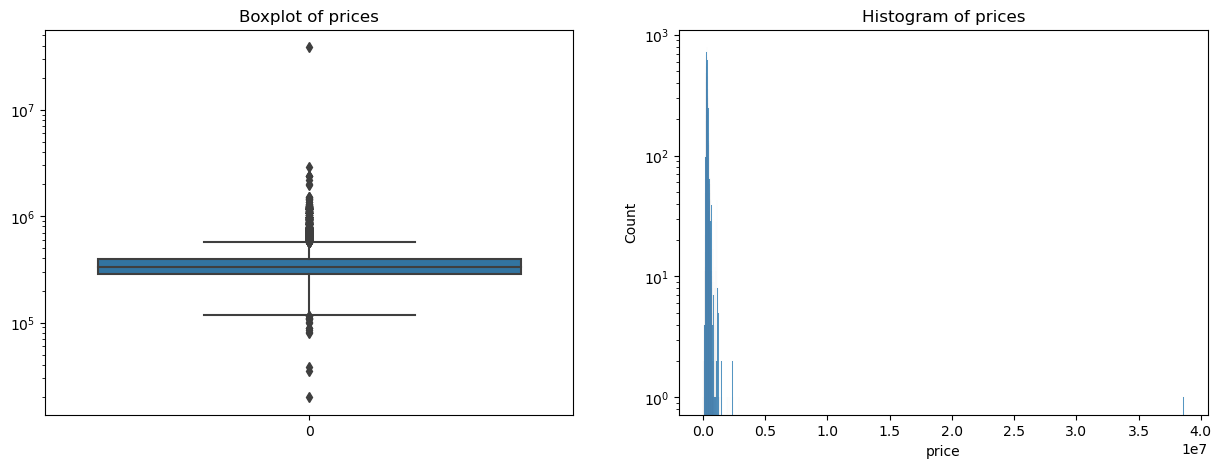

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
h1 = sns.boxplot(df['price'], ax=axs[0])
h1.set_yscale('log')
h1.set(title = 'Boxplot of prices')
h2=sns.histplot(df['price'], ax=axs[1])
h2.set_yscale('log')
h2.set(title = 'Histogram of prices')

## Geographical data

In [13]:
print('Minimum and maximum district longtitude: ', min(df['district_lon']), max(df['district_lon']))
print('Minimum and maximum district latitutde: ', min(df['district_lat']), max(df['district_lat']))

Minimum and maximum district longtitude:  16.84479 17.04581
Minimum and maximum district latitutde:  52.34536 52.45695


In [14]:
print('Minimum and maximum map longtitude: ', min(df['map_lon']), max(df['map_lon']))
print('Minimum and maximum map latitutde: ', min(df['map_lat']), max(df['map_lat']))

Minimum and maximum map longtitude:  16.937951963934673 16.9935407285906
Minimum and maximum map latitutde:  52.37220283839334 52.40293734736885


In [15]:
print((max(df['map_lat'])+min(df['map_lat']))/2, (max(df['map_lon'])+min(df['map_lon']))/2)

52.38757009288109 16.965746346262634


In [16]:
locations = df[['map_lat', 'map_lon', 'price']]
locations.head()

,map_lat,map_lon,price
0,52.391494,16.959516,289000.0
1,52.380535,16.950743,379000.0
2,52.393188,16.945860,339000.0
3,52.391129,16.980279,330000.0
4,52.395861,16.950027,259000.0


In [17]:
import plotly.express as px

fig = px.density_mapbox(locations, lat = 'map_lat', lon = 'map_lon', z = 'price',
                        radius = 7,
                        center = dict(lat = 52.38757009288109, lon = 16.965746346262634),
                        zoom = 10,
                        mapbox_style = 'open-street-map',
                        color_continuous_scale = 'rainbow',
                        opacity = 0.5)
fig.show()

## Creating `district_labels` column

We have information about the precise geographical coordinates of each property as well as information about the district the property is located in. However the latter has some missing values.

As the district seems to be more relevant than precise geographical location (and easier to work with), we will transform the two real-valued variables `district_lat` and `district_lon` into a single categorical variable, the `district_label`.

We will use a single iteration k-means clustering in order to impute the missing values, using the known district center coordinates as cluster centroids.

First, we will create a new column which will store tuples of dristrict centers.

In [18]:
df['district_center'] = np.NaN

In [19]:
df['district_lat'].unique()

array([52.38356, 52.37832, 52.39865,      nan, 52.38841, 52.4122 ,
       52.38019, 52.37772, 52.38044, 52.40773, 52.42069, 52.39591,
       52.41033, 52.42658, 52.39661, 52.41409, 52.40184, 52.42425,
       52.37856, 52.45695, 52.40889, 52.3854 , 52.37053, 52.43655,
       52.41115, 52.39991, 52.40382, 52.40309, 52.34536, 52.39409,
       52.41194, 52.45078])

In [20]:
df['district_lon'].unique()

array([16.9408 , 16.98658, 16.96358,      nan, 16.97551, 16.92186,
       16.94376, 16.91707, 16.96521, 16.93058, 16.9696 , 16.872  ,
       16.94062, 16.93625, 16.94893, 16.98634, 16.88133, 16.90384,
       16.98838, 16.94658, 16.9336 , 16.87281, 16.94245, 16.84479,
       16.95325, 16.94835, 16.95123, 16.95045, 16.98495, 16.8938 ,
       17.04581, 16.94813])

For convienience we will change the NaNs in the `district_lon` and `district_lat` to 0. This will make the nect operations easier.

In [21]:
simp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
df['district_lat'] = simp.fit_transform(df['district_lat'].array.reshape(-1,1))
df['district_lat'].unique()

array([52.38356, 52.37832, 52.39865,  0.     , 52.38841, 52.4122 ,
       52.38019, 52.37772, 52.38044, 52.40773, 52.42069, 52.39591,
       52.41033, 52.42658, 52.39661, 52.41409, 52.40184, 52.42425,
       52.37856, 52.45695, 52.40889, 52.3854 , 52.37053, 52.43655,
       52.41115, 52.39991, 52.40382, 52.40309, 52.34536, 52.39409,
       52.41194, 52.45078])

In [22]:
df['district_lon'] = simp.fit_transform(df['district_lon'].array.reshape(-1,1))
df['district_lon'].unique()

array([16.9408 , 16.98658, 16.96358,  0.     , 16.97551, 16.92186,
       16.94376, 16.91707, 16.96521, 16.93058, 16.9696 , 16.872  ,
       16.94062, 16.93625, 16.94893, 16.98634, 16.88133, 16.90384,
       16.98838, 16.94658, 16.9336 , 16.87281, 16.94245, 16.84479,
       16.95325, 16.94835, 16.95123, 16.95045, 16.98495, 16.8938 ,
       17.04581, 16.94813])

In [23]:
df['district_center'] = tuple(zip(df['district_lat'], df['district_lon']))

In [24]:
df['district_center'].unique()

array([(52.38356, 16.9408), (52.37832, 16.98658), (52.39865, 16.96358),
       (0.0, 0.0), (52.38841, 16.97551), (52.4122, 16.921860000000002),
       (52.38019, 16.94376), (52.37772, 16.917070000000002),
       (52.38044, 16.96521), (52.40773, 16.93058), (52.42069, 16.9696),
       (52.39591, 16.872), (52.41033, 16.940620000000003),
       (52.42658, 16.93625), (52.39661, 16.948929999999997),
       (52.41409, 16.98634), (52.40184, 16.88133), (52.42425, 16.90384),
       (52.37856, 16.98838), (52.45695, 16.946579999999997),
       (52.40889, 16.9336), (52.3854, 16.87281), (52.37053, 16.94245),
       (52.43655, 16.84479), (52.41115, 16.95325), (52.39991, 16.94835),
       (52.40382, 16.95123), (52.40309, 16.95045), (52.34536, 16.98495),
       (52.394090000000006, 16.8938), (52.41194, 17.04581),
       (52.45078, 16.94813)], dtype=object)

We will now change the (0, 0) centers back to NaN.

In [25]:
df.loc[df['district_center'] == (0.0,0.0),'district_center'] = np.nan

In [26]:
df['district_center'].unique()

array([(52.38356, 16.9408), (52.37832, 16.98658), (52.39865, 16.96358),
       nan, (52.38841, 16.97551), (52.4122, 16.921860000000002),
       (52.38019, 16.94376), (52.37772, 16.917070000000002),
       (52.38044, 16.96521), (52.40773, 16.93058), (52.42069, 16.9696),
       (52.39591, 16.872), (52.41033, 16.940620000000003),
       (52.42658, 16.93625), (52.39661, 16.948929999999997),
       (52.41409, 16.98634), (52.40184, 16.88133), (52.42425, 16.90384),
       (52.37856, 16.98838), (52.45695, 16.946579999999997),
       (52.40889, 16.9336), (52.3854, 16.87281), (52.37053, 16.94245),
       (52.43655, 16.84479), (52.41115, 16.95325), (52.39991, 16.94835),
       (52.40382, 16.95123), (52.40309, 16.95045), (52.34536, 16.98495),
       (52.394090000000006, 16.8938), (52.41194, 17.04581),
       (52.45078, 16.94813)], dtype=object)

In [27]:
df_nan = df[df['district_center'].isna()][['map_lon', 'map_lat']].copy()
df_nan.head()

,map_lon,map_lat
14,16.949558,52.383146
30,16.949636,52.383323
69,16.988419,52.393957
82,16.979557,52.388960
105,16.983150,52.391399


In [28]:
df_nonnan = df.dropna(subset='district_center')[['district_lon', 'district_lat','district_center']].copy()
df_nonnan.head()
df_nonnan['district_center'].nunique()

31

In [29]:
df_nonnan = df_nonnan.rename(columns={'district_lon': "lon", "district_lat": "lat"})
df_nan = df_nan.rename(columns={'map_lon': "lon", "map_lat": "lat"})

In [30]:
centers = list(df_nonnan['district_center'].unique())
centers

[(52.38356, 16.9408),
 (52.37832, 16.98658),
 (52.39865, 16.96358),
 (52.38841, 16.97551),
 (52.4122, 16.921860000000002),
 (52.38019, 16.94376),
 (52.37772, 16.917070000000002),
 (52.38044, 16.96521),
 (52.40773, 16.93058),
 (52.42069, 16.9696),
 (52.39591, 16.872),
 (52.41033, 16.940620000000003),
 (52.42658, 16.93625),
 (52.39661, 16.948929999999997),
 (52.41409, 16.98634),
 (52.40184, 16.88133),
 (52.42425, 16.90384),
 (52.37856, 16.98838),
 (52.45695, 16.946579999999997),
 (52.40889, 16.9336),
 (52.3854, 16.87281),
 (52.37053, 16.94245),
 (52.43655, 16.84479),
 (52.41115, 16.95325),
 (52.39991, 16.94835),
 (52.40382, 16.95123),
 (52.40309, 16.95045),
 (52.34536, 16.98495),
 (52.394090000000006, 16.8938),
 (52.41194, 17.04581),
 (52.45078, 16.94813)]

In [31]:
df.district_center.nunique()

31

In [32]:
from sklearn.cluster import KMeans

n_clusters = df.district_center.nunique()
km_imp = KMeans(n_clusters, init=centers, n_init=1)

In [33]:
km_imp.fit(df_nonnan[['lon', 'lat']])

KMeans(init=[(52.38356, 16.9408), (52.37832, 16.98658), (52.39865, 16.96358),
             (52.38841, 16.97551), (52.4122, 16.921860000000002),
             (52.38019, 16.94376), (52.37772, 16.917070000000002),
             (52.38044, 16.96521), (52.40773, 16.93058), (52.42069, 16.9696),
             (52.39591, 16.872), (52.41033, 16.940620000000003),
             (52.42658, 16.93625), (52.39661, 16.948929999999997),
             (52.41409, 16.98634), (52.40184, 16.88133), (52.42425, 16.90384),
             (52.37856, 16.98838), (52.45695, 16.946579999999997),
             (52.40889, 16.9336), (52.3854, 16.87281), (52.37053, 16.94245),
             (52.43655, 16.84479), (52.41115, 16.95325), (52.39991, 16.94835),
             (52.40382, 16.95123), (52.40309, 16.95045), (52.34536, 16.98495),
             (52.394090000000006, 16.8938), (52.41194, 17.04581), ...],
       n_clusters=31, n_init=1)

In [34]:
km_imp.predict(df_nonnan[['lon', 'lat']])

array([27, 27, 27, ..., 27,  6, 27])

In [35]:
km_imp.predict(df_nan[['lon', 'lat']])

array([24, 24, 12, 12, 12, 24, 12, 12, 28, 12,  6, 12, 24,  6,  6,  6, 24,
       14,  6, 12,  3, 23,  6, 28, 14, 14, 28,  3, 24, 24, 14, 27,  3,  3,
        3, 12, 24, 28,  3,  3,  3,  3, 12,  6,  7,  7, 12, 27,  3, 12, 12,
       12, 12, 12,  3,  3, 24, 12,  3,  3,  3, 12,  3,  3, 28,  3, 12,  6,
       12, 24,  6, 24,  1, 24, 24, 24, 12,  7, 24, 24, 12, 28,  3,  3, 24,
        3, 24,  3, 24, 24, 28,  3, 12,  6, 24,  6,  6,  6,  6,  3, 12, 12,
       12,  3,  3, 12,  6,  3,  6,  3, 24, 12,  3,  3,  6,  3, 24, 27, 27,
        3,  6, 12,  3,  6, 27,  3,  3, 24, 28,  3,  3,  3, 24,  2,  3,  3,
       24, 24, 24,  3, 28, 27, 24,  3,  3, 24,  6,  3,  3, 24, 12, 27, 27,
       12,  3,  3,  3, 12, 24, 27,  3,  3,  3, 24,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3, 24, 27, 27,  3,  3,  3, 12,  6, 24, 27,  3])

In [36]:
df_nonnan['district_label'] = km_imp.predict(df_nonnan[['lon', 'lat']])
df_nonnan.head()

,lon,lat,district_center,district_label
0,16.9408,52.38356,"(52.38356, 16.9408)",27
1,16.9408,52.38356,"(52.38356, 16.9408)",27
2,16.9408,52.38356,"(52.38356, 16.9408)",27
3,16.9408,52.38356,"(52.38356, 16.9408)",27
4,16.9408,52.38356,"(52.38356, 16.9408)",27


In [37]:
df_nan['district_label'] = km_imp.predict(df_nan[['lon', 'lat']])
df_nan.head()

,lon,lat,district_label
14,16.949558,52.383146,24
30,16.949636,52.383323,24
69,16.988419,52.393957,12
82,16.979557,52.388960,12
105,16.983150,52.391399,12


In [38]:
df['district_label'] = np.NaN

In [39]:
df[df['district_center'].isna()]

,id,market,created_at_first,created_at,district_lon,district_lat,description,price,m,price_per_m,...,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,district_center,district_label
14,438716,2,2018-01-24 20:50:44,2018-01-25 14:06:36,0.0,0.0,<p>Serdecznie polecam na sprzedać 3 pokojowe m...,270000.0,48.000000,5625.00,...,2.601194e-05,2.907384e-05,5.819971e-05,5.993749e-05,3.128975e-05,3.225914e-05,2.011283e-05,3.892565e-05,NaN,NaN
30,447860,2,2018-01-25 12:00:58,2018-01-25 14:06:36,0.0,0.0,<p>Serdecznie polecam na sprzedać 3 pokojowe m...,270000.0,48.099998,5613.31,...,1.134288e-05,8.550806e-05,2.882797e-05,5.259301e-05,1.276188e-05,1.136156e-04,1.245420e-05,3.014146e-05,NaN,NaN
69,99157,2,2018-01-06 22:15:16,2018-03-02 20:02:50,0.0,0.0,<p>Polecam na sprzedaż 3pokojowe mieszkanie na...,499000.0,64.500000,7736.43,...,2.560306e-05,1.895970e-04,7.568716e-05,1.321694e-04,2.684651e-05,7.996189e-05,2.940058e-05,5.600191e-05,NaN,NaN
82,193461,2,2018-01-11 18:31:25,2018-02-03 18:40:32,0.0,0.0,"<p>Mieszkanie 3-pokojowe /59 m2, balkon, ptr.1...",329900.0,59.000000,5591.53,...,1.606000e-04,1.072540e-03,3.910934e-04,6.948085e-04,1.784308e-04,8.195665e-04,1.833104e-04,4.054450e-04,NaN,NaN
105,282680,2,2018-01-16 15:43:00,2018-02-09 11:17:39,0.0,0.0,<p>Obwieszczenie o przetargu</p><p>Syndyk masy...,152800.0,62.900002,2429.25,...,4.924035e-04,1.041270e-03,1.649590e-03,1.941154e-03,6.158875e-04,9.683866e-04,5.751280e-04,9.601947e-04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12773,9401262,2,2020-11-27 11:27:33,2020-12-22 15:42:15,0.0,0.0,"<p>Spółdzielnia Mieszkaniowa ""Osiedle Młodych""...",266700.0,48.799999,5465.16,...,6.825869e-308,1.948605e-307,2.114558e-307,2.421574e-307,7.137361e-308,1.310011e-307,1.114799e-307,1.033227e-307,NaN,NaN
13285,9492792,2,2020-12-26 14:50:23,2021-01-13 15:30:58,0.0,0.0,<p>| <br/>Polecam na sprzedaż bardzo atrakcyjn...,337000.0,48.799999,6905.74,...,1.606066e-04,1.550051e-03,4.149229e-04,6.873336e-04,1.831427e-04,1.086453e-03,1.850285e-04,4.173577e-04,NaN,NaN
13454,9448227,2,2020-12-09 22:50:24,2020-12-15 18:20:51,0.0,0.0,<p><br/>Śliczne mieszkanie po kapitalnym remon...,427000.0,48.000000,8895.83,...,7.526704e-308,3.249124e-307,2.224508e-307,3.280661e-307,9.497081e-308,2.476024e-307,9.067506e-308,2.059187e-307,NaN,NaN
13480,9491944,1,2020-12-25 08:59:10,2021-01-24 09:00:06,0.0,0.0,<p><strong>Inwestycja doskonale skomunikowana ...,225000.0,25.980000,8660.51,...,4.403277e-04,6.228219e-03,1.126067e-03,1.908865e-03,4.855528e-04,1.680738e-03,5.211593e-04,1.075525e-03,NaN,NaN


In [40]:
df.loc[df['district_center'].isna(), 'district_label'] = df_nan['district_label']
df.loc[~df['district_center'].isna(), 'district_label'] = df_nonnan['district_label']
df['district_label'] = df['district_label'].astype(int)

In [41]:
df = df.drop(columns=['district_lon', 'district_lat', 'map_lon', 'map_lat', 'district_center'])

In [42]:
df.head()

,id,market,created_at_first,created_at,description,price,m,price_per_m,price[currency],rooms_num,...,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,district_label
0,49341,2,2018-01-04 13:11:05,2018-01-08 11:27:35,<p>Zapraszam do zapoznania się z ofertą sprzed...,289000.0,48.000000,6020.83,PLN,3,...,1.931281e-307,8.066192e-308,2.241937e-307,2.488141e-307,3.560156e-307,1.089161e-307,1.527364e-307,1.052543e-307,1.885789e-307,27
1,261720,2,2018-01-15 19:12:07,2018-01-25 11:11:31,<p>Zapraszam do zapoznania się z ofertą sprzed...,379000.0,61.000000,6213.11,PLN,3,...,2.019856e-04,1.065165e-04,5.931803e-04,2.814421e-04,5.154491e-04,1.089486e-04,3.779765e-04,1.148382e-04,2.413455e-04,27
2,50441,2,2018-01-04 13:53:29,2018-01-11 05:55:12,<p>Weychan Nieruchomości Monika Hałas - Kurcza...,339000.0,63.000000,5380.95,PLN,3,...,3.800732e-03,2.209178e-03,2.069247e-03,4.369802e-03,4.764892e-03,1.937723e-03,2.134303e-03,1.535459e-03,2.438574e-03,27
3,203518,2,2018-01-12 11:10:57,2018-01-30 14:38:39,<p>Oferuję na sprzedaż jasne i zadbane mieszka...,330000.0,59.200001,5574.32,PLN,3,...,4.325130e-05,1.976439e-05,2.912086e-05,5.924220e-05,6.405117e-05,2.883527e-05,2.801014e-05,1.926692e-05,3.855275e-05,27
4,5,2,2018-01-02 11:34:51,2018-01-18 14:22:29,<p><strong>Dwa pokoje na niskim piętrze tuż pr...,259000.0,38.000000,6815.79,PLN,2,...,8.863763e-04,4.121158e-04,4.647455e-03,1.070394e-03,1.756168e-03,4.691628e-04,2.187919e-03,4.904569e-04,1.040398e-03,27


## Datetime data

The time when the listing was created can have a significant impact on the price of the property. Let us first convert the `created_at_first` and `created_at` columns into `datetime` and visualise the relation between price and time of last creation.

In [43]:
df['created_at_first'] = pd.to_datetime(df['created_at_first'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['free_from'] = pd.to_datetime(df['free_from'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13745 entries, 0 to 13744
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   13745 non-null  int64         
 1   market               13745 non-null  int64         
 2   created_at_first     13745 non-null  datetime64[ns]
 3   created_at           13745 non-null  datetime64[ns]
 4   description          13745 non-null  object        
 5   price                13745 non-null  float64       
 6   m                    13745 non-null  float64       
 7   price_per_m          13745 non-null  float64       
 8   price[currency]      13745 non-null  object        
 9   rooms_num            13745 non-null  int64         
 10  building_type        11011 non-null  float64       
 11  floor_no             12777 non-null  float64       
 12  building_floors_num  11657 non-null  float64       
 13  building_material    5950 non-n

c:\Users\fpazi\anaconda3\envs\olx\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



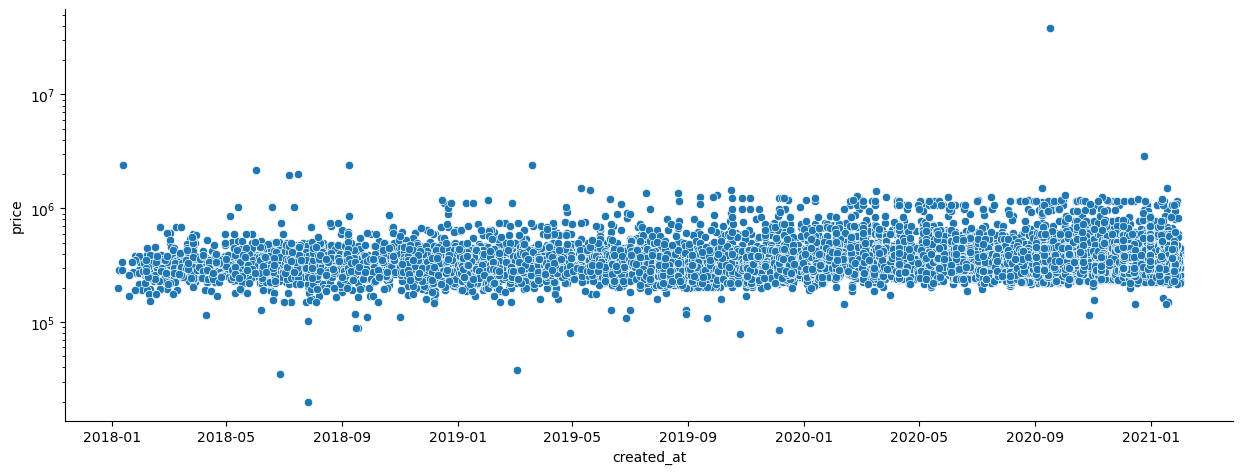

In [44]:
g = sns.relplot(x=df['created_at'], y= df['price'], height=5, aspect=2.5)
g.set(yscale = 'log')
g

c:\Users\fpazi\anaconda3\envs\olx\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



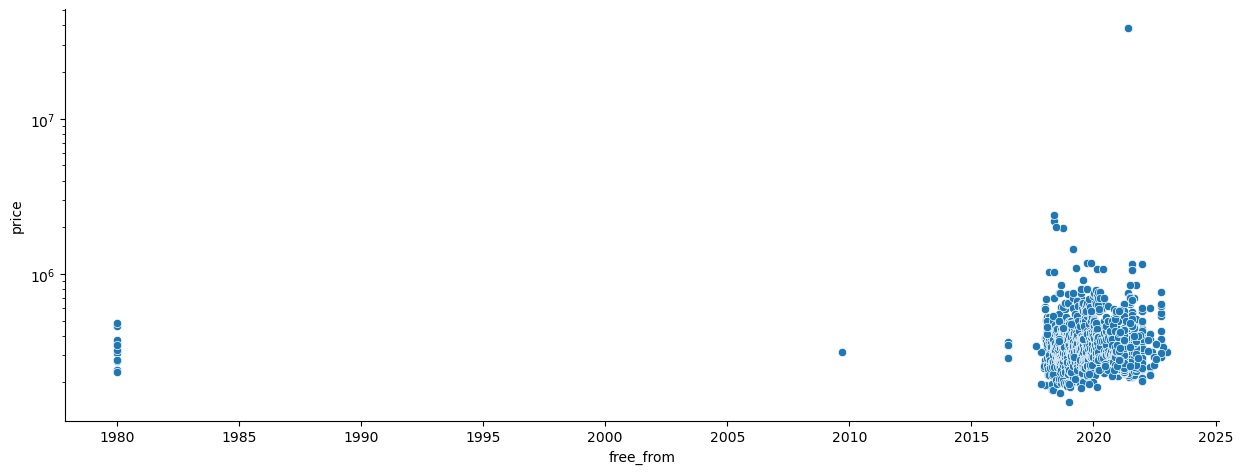

In [45]:
g = sns.relplot(x=df['free_from'], y= df['price'], height=5, aspect=2.5)
g.set(yscale = 'log')
g

In [46]:
df['year'] = df['created_at'].apply(lambda x: x.year)
df['year']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
13740    2021
13741    2021
13742    2021
13743    2021
13744    2021
Name: year, Length: 13745, dtype: int64

<Axes: xlabel='year', ylabel='price'>

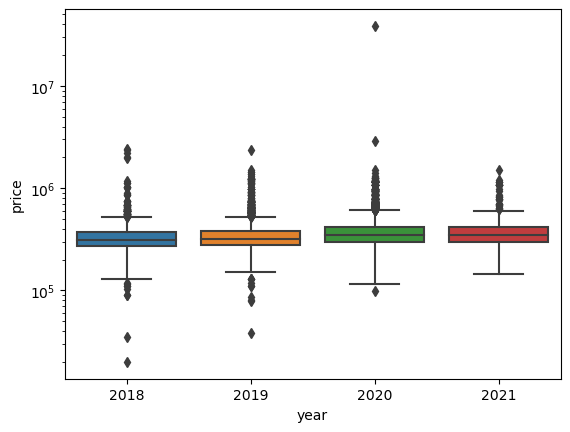

In [47]:
g = sns.boxplot(data=df, y='price', x='year')
g.set(yscale='log')
g

In [48]:
reupload_time = df['created_at'] - df['created_at_first']
reupload_time = reupload_time.apply(lambda x: float(x.days))
reupload_time

0         3.0
1         9.0
2         6.0
3        18.0
4        16.0
         ... 
13740     0.0
13741     0.0
13742     0.0
13743     5.0
13744     0.0
Length: 13745, dtype: float64

[Text(0.5, 1.0, 'Histogram of time between first and last creation of lisiting')]

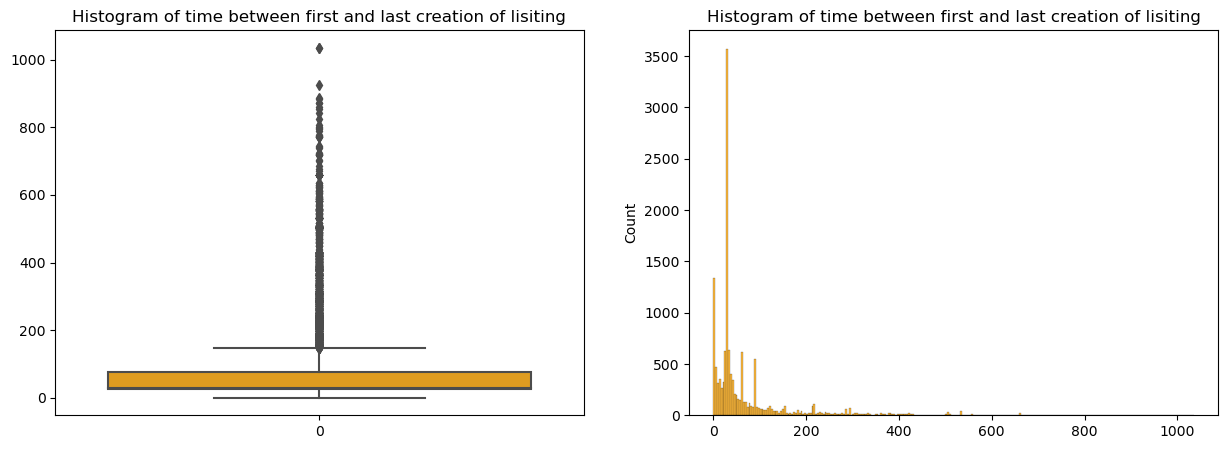

In [49]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
h1 = sns.boxplot(reupload_time, ax=axs[0], color='orange')
# h1.set_yscale('log')
h1.set(title = 'Histogram of time between first and last creation of lisiting')
h2=sns.histplot(reupload_time, ax=axs[1], color='orange')
# h2.set_yscale('log')
h2.set(title = 'Histogram of time between first and last creation of lisiting')

We see that for the vast majority of lisitings, the time between first creation and update is less than a year. Therefore we can focus only on the latter.

In [50]:
df = df.drop(columns = ['created_at_first', 'year', 'id', 'price[currency]'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13745 entries, 0 to 13744
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   market               13745 non-null  int64         
 1   created_at           13745 non-null  datetime64[ns]
 2   description          13745 non-null  object        
 3   price                13745 non-null  float64       
 4   m                    13745 non-null  float64       
 5   price_per_m          13745 non-null  float64       
 6   rooms_num            13745 non-null  int64         
 7   building_type        11011 non-null  float64       
 8   floor_no             12777 non-null  float64       
 9   building_floors_num  11657 non-null  float64       
 10  building_material    5950 non-null   float64       
 11  windows_type         9049 non-null   float64       
 12  heating              9864 non-null   float64       
 13  build_year           8587 non-n

In [51]:
df.to_csv('PrzefiltrowanaRamka\\PrzefiltrowanaRamka2.csv', index=False)

In [52]:
# profile = ProfileReport(df, title="Profiling Report")
# profile